**Import Required Libraries**

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import plot_model

*  import numpy as np: Imports the NumPy library for numerical operations.
*  import tensorflow: Imports the TensorFlow library.
*  from tensorflow.keras.models import Sequential: Imports the Sequential model class from Keras.
*  from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout: Imports the Embedding, Conv1D, GlobalMaxPooling1D, Dense, and Dropout layer classes from Keras.
*  from tensorflow.keras.utils import plot_model: Imports the plot_model utility for visualizing the model architecture.

**Define Hyperparameters**

In [2]:
vocab_size = 10000
embedding_dim = 100
num_filters = 128
filter_size = 3
hidden_dim = 256
output_dim = 10
dropout = 0.5
max_sequence_length = 100

*  vocab_size: The size of the vocabulary (number of unique words).
*  embedding_dim: The dimension of the embedding vectors.
*  num_filters: The number of filters in the Conv1D layer.
*  filter_size: The size of the convolutional filters.
*  hidden_dim: The number of units in the Dense layer.
*  output_dim: The number of output classes (for a multi-class classification problem).
*  dropout: The dropout rate for regularization.
*  max_sequence_length: The maximum length of input sequences.

**Define the Model**

In [3]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_sequence_length))
model.add(Conv1D(filters = num_filters, kernel_size = filter_size, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dim, activation = 'relu'))
model.add(Dropout(dropout))
model.add(Dense(output_dim, activation = 'softmax'))

*  model = Sequential(): Initializes a sequential model.
*  model.add(Embedding(vocab_size, embedding_dim, input_length = max_sequence_length)): Adds an embedding layer that converts word indices to dense vectors of size embedding_dim. The input_length parameter specifies the length of input sequences.
*  model.add(Conv1D(filters = num_filters, kernel_size = filter_size, activation = 'relu')): Adds a 1D convolutional layer with num_filters filters, each of size filter_size, and ReLU activation function.
*  model.add(GlobalMaxPooling1D()): Adds a global max pooling layer to reduce the dimensionality of the feature maps.
*  model.add(Dense(hidden_dim, activation = 'relu')): Adds a dense layer with hidden_dim units and ReLU activation function.
*  model.add(Dropout(dropout)): Adds a dropout layer with a dropout rate of dropout to prevent overfitting.
*  model.add(Dense(output_dim, activation = 'softmax')): Adds a dense output layer with output_dim units and a softmax activation function, suitable for multi-class classification.

**Compile the Model**

In [4]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.compile(...): Compiles the model with the following parameters:
*  loss = 'categorical_crossentropy': Uses categorical cross-entropy as the loss function.
*  optimizer = 'adam': Uses the Adam optimizer.
*  metrics = ['accuracy']: Tracks accuracy during training.

**Summarize the Model**

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 98, 128)           38528     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

model.summary(): Prints a summary of the model architecture, including the number of parameters in each layer.

**Visualize the Model**

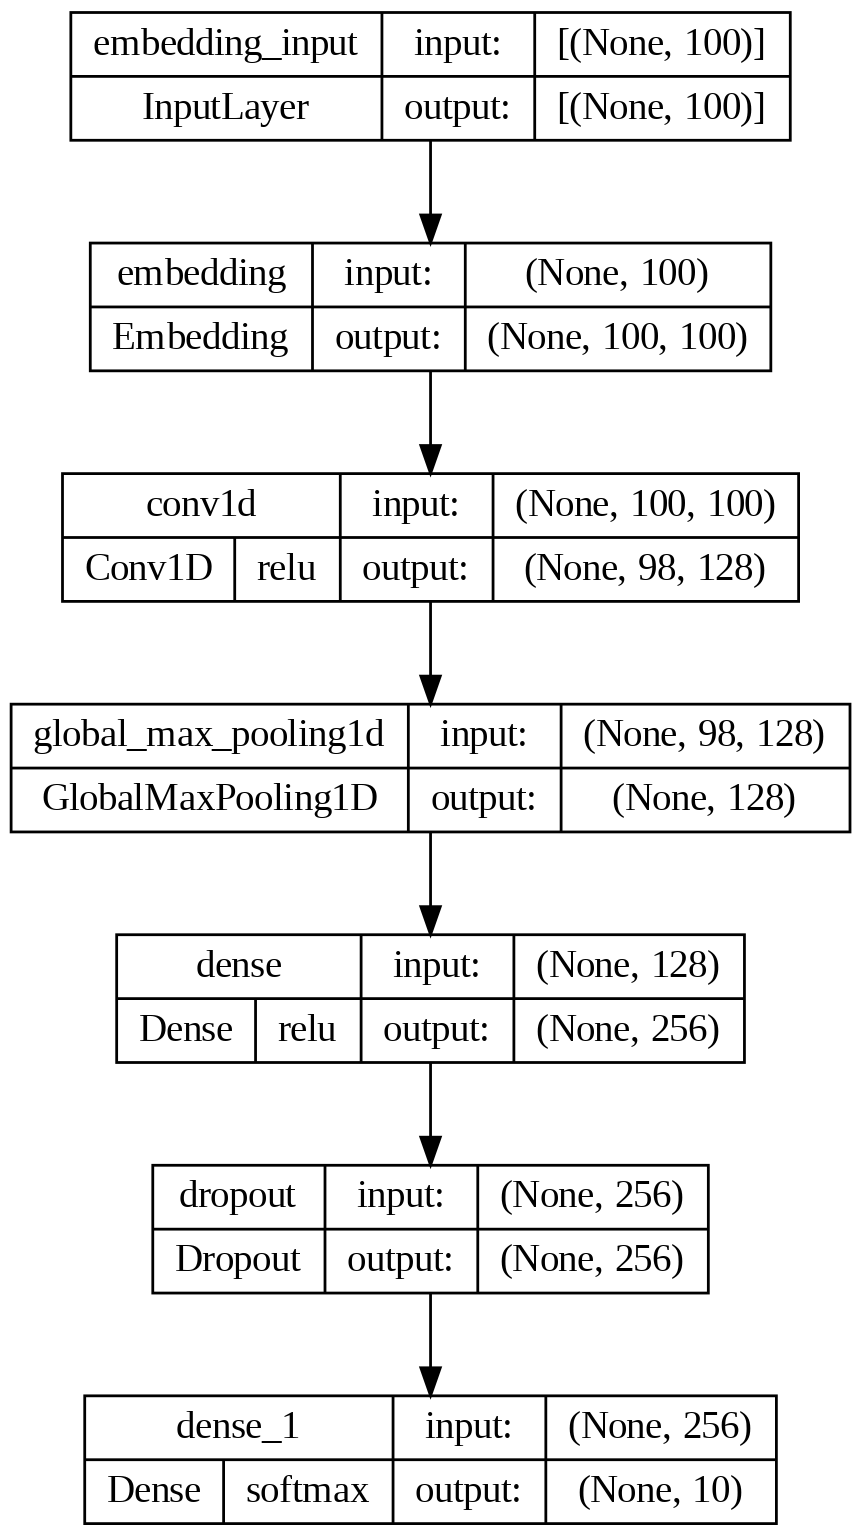

In [6]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False
)

plot_model(...): Generates a plot of the model architecture and saves it as model.png. The options specified include:
*  show_shapes=True: Displays the shapes of the layers.
*  show_layer_names=True: Displays the names of the layers.
*  rankdir='TB': Sets the direction of the plot (top to bottom).
*  dpi=200: Sets the resolution of the plot.
*  show_layer_activations=True: Displays the activation functions used in each layer.

**Summary**<br>
This code sets up, compiles, summarizes, and visualizes a Convolutional Neural Network (CNN) for text classification. The network consists of an embedding layer to convert word indices to dense vectors, a 1D convolutional layer to extract features, a global max pooling layer to reduce the dimensionality of the feature maps, a dense layer with dropout for regularization, and a dense output layer with a softmax activation function for multi-class classification. The model is compiled using categorical cross-entropy loss and the Adam optimizer, and its architecture is summarized and visualized using Keras utilities.